In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# inspect training data provided

In [61]:
name_folder = 'COMP30027_2021_Project2_datasets'
data_train = pd.read_csv(name_folder + '/recipe_train.csv')
data_train

,name,n_steps,n_ingredients,steps,ingredients,duration_label
0,wi gal s chicken rice stove top dish made heal...,6,12,"['in saucepan , melt margarine and combine wit...","['margarine', 'olive oil', 'celery', 'onion', ...",2.0
1,irish pin oats,9,5,['melt 1 tbs butter in a small saucepan over m...,"['butter', 'pinhead oats', 'water', 'half-and-...",2.0
2,cheesy beef n biscuit casserole,15,10,"['brown ground beef , onion and green pepper',...","['ground beef', 'onion', 'green pepper', 'toma...",2.0
3,lemonade chicken oamc,10,8,"['brown chicken in oil', 'combine all ingredie...","['boneless skinless chicken', 'frozen lemonade...",2.0
4,graham and peanut butter bon bons,6,5,"['set almond bark aside', 'mix remaining ingre...","['graham cracker crumbs', 'crunchy peanut butt...",2.0
...,...,...,...,...,...,...
39995,sour cream lemon bread abm,6,13,"['in a measuring cup , combine sour cream and ...","['sour cream', 'lemon juice', 'milk', 'butter'...",1.0
39996,americanized shepherd s pie,15,16,"['preheat oven to 350 degrees', 'add potatoes ...","['potatoes', 'butter', 'milk', 'olive oil', 'o...",2.0
39997,new zealand kiwi salsa,5,8,"['place the kiwifruit , pomegranate seeds , av...","['kiwi fruits', 'pomegranate seeds', 'avocado'...",1.0
39998,meat and vegetable shepherd s pie,7,17,"['in a large , deep frying pan , heat oil over...","['oil', 'onions', 'garlic cloves', 'minced bee...",2.0


# inspect training data label distribution

In [51]:
data_train['duration_label'].value_counts()

2.0    20246
1.0    17705
3.0     2049
Name: duration_label, dtype: int64

# found the problem of imbalanced classes/labels

#### what is imbalanced data:
classes are not represented equally
#### why it's a problem:
- when the dataset has underrepresented data, the class distribution starts skew
- learning from such data cannot guarantee efficient solution and might turn out to complete wastes with zero residues to reuse
- unequal cost of misclassification errors (misclassification an example from majority class as an example from minority class called a false-positive is often not desired, but less critical than classifying an example from minority class as belonging to the majority class, so-called false negative. e.g.cancer)

#### how to combat imbalanced traning data:
- change performance metric(confusion matrix, precision, recall, F-score, Kappa, ROC Curves....)
- resample your dataset     
  rules of thumb: (oversampling -> when u have tens of thousands of record or less        
                   undersampling -> when you have tens or hundreds of thousands of instances or more        
                   random and non-random(e.g.stratified) sampling schemes     
                   different resampled ratios could be tried)     
- generate synthetic samples(any data applicable to a given situation that are not obtained by direct measurement/is created algorithmically--SMOTE algorithms or Synthetic Minority Over-sampling technique)
- try differnent algorithms(decision trees often performs well on imbalanced datasets. The splitting rules that look at the class variable used in creation of the trees, can force both classes to be addressed. popular DT algo like C4.5, C5.0, CART and Random Forest)
- try penalized models if you are locked into a specific algorithm and are unable to resample(penalized-SVM, penalized-LDA...)

#### what we can do in the code:
- resample the dataset using undersampling as we have 40,000 instances.
- try differnent algorithms
- use performance matric as well as accuracy    
- stratified sampling while spliting the data   

#### what i will do in the code for now:    
- split data into test_size = 0.33 and do undersampling on training set          

#### future plan in the code:    
- i wanna use cross-validation to:    
  test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset        
- if using undersampling with k fold cross-validation, the procedure is to loop through each cross-validation fold and do undersampling on each training set. Then use the new undersampled training data to fit in the model and do evaluation              
- or using StratifiedKFold to preserve the percentage of samples for each class and combat imbalanced training set problem       

reference:     
https://machinelearningmastery.com/imbalanced-classification-is-hard/?fbclid=IwAR32z1MAWfQHRn2iaxsgIoEFO2U0tw9UsM1zsdZ1CyonMWfSoSo6yr9Hnq4
       
https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/?fbclid=IwAR1ULPk7BQICkJI1ABtAa8BuUZZLeUSaudnpr_aY7bTrX3xzAgfNaqfu5ls

# spliting dataset

#### why spliting data:    
- minimize the potential for bias in evaluation and validation process     
- detect if the model suffers from underfitting or overfitting     
  underfitting: a model being unable to encapsulate the relations among data     
                (e.g.represent nonlinear relations with linear model)    
  overfitting: a model has excessively complex structure      
               learns both existing relations among data and noise      
               bad generalization capabilities      

#### how to split data:     
- in most cases, it's enough to split into training set, validation set and test set        
  -training set: fit your model/build up a model        
  -validation set: used for unbiased model evaluation during hyerparameter tuning       
  -test set: unbiased evaluation of the final model       
- random_state = non-negative integer if need random split with same output      
- stratify = y if you want to keep proportion of y values through train and test sets(e.g.when classifying imbalanced dataset)      

## other validation functionalities:   

##### cross-validation:    
- combine the measures of prediction performance to get more accurate model estimations    
- widely used cross-validation methods is k-fold cross-validation   
  divide your dataset into k (often five or ten) subsets, or folds, of equal size and then perform the training and test procedures k times    
- StratifiedKFold, LeaveOneOut      

##### learning curve:   
- shows how the prediction score of training and validation sets depends on the number of training samples     
- find the optimal size of the training set, choose hyperparameters, compare models, and so on    

##### Hyperparameter tuning:   
- determining the best set of hyperparameters to define your machine learning model    
reference:     
https://realpython.com/train-test-split-python-data/     

# feature selection
Supervised: Use the target variable (e.g. remove irrelevant variables).
- Wrapper: Search for well-performing subsets of features.
RFE
- Filter: Select subsets of features based on their relationship with the target.
Statistical Methods
Feature Importance Methods
- Intrinsic: Algorithms that perform automatic feature selection during training.
Decision Trees
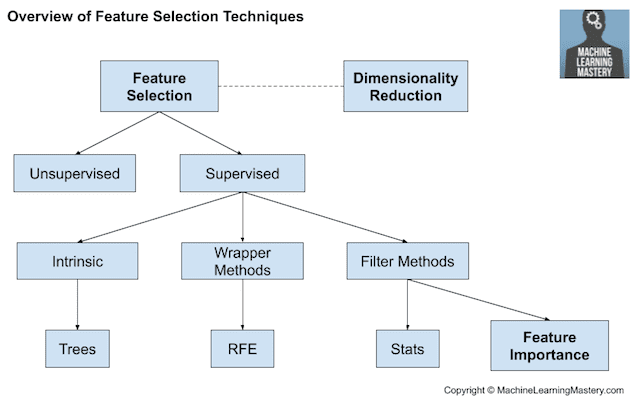
#### Statistics for Filter-Based Feature Selection Methods    
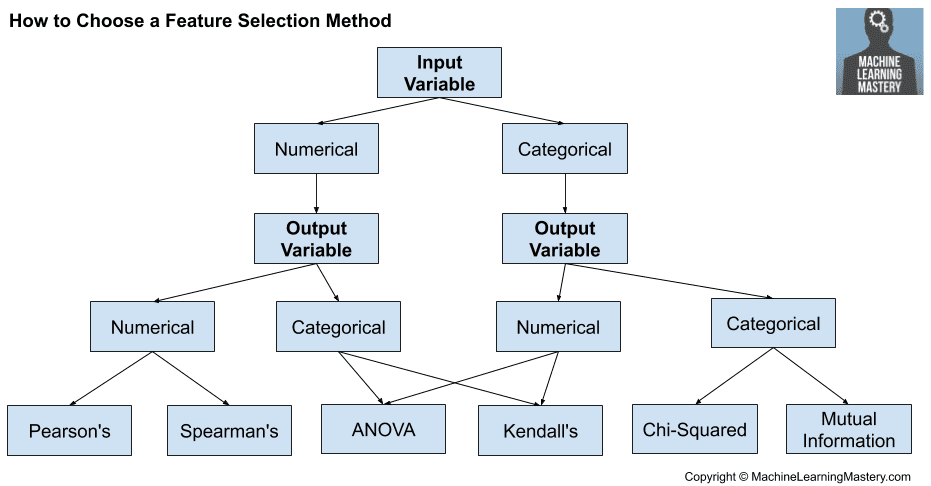

reference:    
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/     

# preprocessing - text feature    
- 'steps', 'ingredients' are string of list of string
- convert to list using eval() which recognises data structure inside string and convert to that type

In [52]:
data_train['steps'] = data_train['steps'].apply(eval) #apply func on every element 
data_train['ingredients'] = data_train['ingredients'].apply(eval)
data_train.loc[0, 'steps']

['in saucepan , melt margarine and combine with olive oil',
 'add celery & onion and saute until tender',
 'add garlic for the last minute',
 'add carrots , broth , rice and pepper and bring to a boil',
 'reduce heat , cover , and simmer for 35 minutes , or until rice is tender',
 'stir in chicken and parsley , cover , and simmer for 5 minutes longer or until heated through']

- change data_train to all numerical features:
  1. add doc2vec 
- after split: new sparese matrix use transform() on both train and dev set SEPERATELY    XXXXXX not possible bc dataframe will be way too big(col>1000?)   

In [62]:
# add doc2vec on data_train
d2v_ingr = pd.read_csv("COMP30027_2021_Project2_datasets/recipe_text_features_doc2vec50/train_ingr_doc2vec50.csv", header=None)
d2v_name = pd.read_csv("COMP30027_2021_Project2_datasets/recipe_text_features_doc2vec50/train_name_doc2vec50.csv", header=None)
d2v_steps = pd.read_csv("COMP30027_2021_Project2_datasets/recipe_text_features_doc2vec50/train_steps_doc2vec50.csv", header=None)
data_train = pd.concat([data_train, d2v_ingr, d2v_name, d2v_steps], axis=1)
data_train

,name,n_steps,n_ingredients,steps,ingredients,duration_label,0,1,2,3,...,40,41,42,43,44,45,46,47,48,49
0,wi gal s chicken rice stove top dish made heal...,6,12,"['in saucepan , melt margarine and combine wit...","['margarine', 'olive oil', 'celery', 'onion', ...",2.0,0.778498,-0.377335,-0.082465,0.256763,...,0.524914,-0.059248,-0.851974,-0.878965,0.110095,0.177768,-0.369561,0.355961,-0.481994,0.356241
1,irish pin oats,9,5,['melt 1 tbs butter in a small saucepan over m...,"['butter', 'pinhead oats', 'water', 'half-and-...",2.0,0.222236,-0.015095,-0.097956,0.023984,...,-1.743889,0.805147,-0.825264,0.058763,1.868224,-1.211003,-2.073559,0.249009,-1.054287,-0.293384
2,cheesy beef n biscuit casserole,15,10,"['brown ground beef , onion and green pepper',...","['ground beef', 'onion', 'green pepper', 'toma...",2.0,-0.398658,-0.138758,-0.808574,-0.214231,...,0.333650,-0.673702,-2.324360,0.687601,-0.939967,-1.561040,-0.732557,-0.939450,0.274603,-0.620148
3,lemonade chicken oamc,10,8,"['brown chicken in oil', 'combine all ingredie...","['boneless skinless chicken', 'frozen lemonade...",2.0,0.190399,0.088978,-0.642451,0.247710,...,0.607433,-0.018920,-2.685916,-0.463611,-0.059493,1.212257,-0.245923,-0.432690,-0.592135,0.654083
4,graham and peanut butter bon bons,6,5,"['set almond bark aside', 'mix remaining ingre...","['graham cracker crumbs', 'crunchy peanut butt...",2.0,0.123884,-0.177402,-0.255665,-0.146375,...,0.214621,-0.520235,0.130486,0.211613,0.499143,0.743107,-0.426484,0.528443,-0.694904,0.264700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,sour cream lemon bread abm,6,13,"['in a measuring cup , combine sour cream and ...","['sour cream', 'lemon juice', 'milk', 'butter'...",1.0,-0.423706,-0.069141,-0.339097,-0.340613,...,0.066317,-0.529131,-1.078020,0.445699,-0.757968,0.557478,0.097131,0.444583,0.556911,0.224863
39996,americanized shepherd s pie,15,16,"['preheat oven to 350 degrees', 'add potatoes ...","['potatoes', 'butter', 'milk', 'olive oil', 'o...",2.0,0.049580,-0.093135,-0.540504,-0.284157,...,-1.246466,1.540797,-1.392812,-0.494735,-0.114502,-0.351079,-0.845888,-0.123080,0.474510,0.019088
39997,new zealand kiwi salsa,5,8,"['place the kiwifruit , pomegranate seeds , av...","['kiwi fruits', 'pomegranate seeds', 'avocado'...",1.0,0.168235,-0.244570,-0.064598,-0.359103,...,0.454007,-1.052013,0.496355,1.004171,0.237426,-1.293243,0.792720,-0.514634,1.201972,0.139259
39998,meat and vegetable shepherd s pie,7,17,"['in a large , deep frying pan , heat oil over...","['oil', 'onions', 'garlic cloves', 'minced bee...",2.0,0.219075,0.130056,-0.323175,-0.483460,...,-0.036450,0.486010,-1.246498,-0.175695,-0.475982,0.737286,-0.400827,0.635068,-0.527436,0.370146


In [63]:
list_header = ['name', 'n_steps', 'n_ingredients', 'steps', 'ingredients', 'duration_label']
for i in range(150):
    list_header.append(str(i))
#pandas.DataFrame.to_csv(file, header=str_list, index=False)
data_train.columns = list_header
data_train


,name,n_steps,n_ingredients,steps,ingredients,duration_label,0,1,2,3,...,140,141,142,143,144,145,146,147,148,149
0,wi gal s chicken rice stove top dish made heal...,6,12,"['in saucepan , melt margarine and combine wit...","['margarine', 'olive oil', 'celery', 'onion', ...",2.0,0.778498,-0.377335,-0.082465,0.256763,...,0.524914,-0.059248,-0.851974,-0.878965,0.110095,0.177768,-0.369561,0.355961,-0.481994,0.356241
1,irish pin oats,9,5,['melt 1 tbs butter in a small saucepan over m...,"['butter', 'pinhead oats', 'water', 'half-and-...",2.0,0.222236,-0.015095,-0.097956,0.023984,...,-1.743889,0.805147,-0.825264,0.058763,1.868224,-1.211003,-2.073559,0.249009,-1.054287,-0.293384
2,cheesy beef n biscuit casserole,15,10,"['brown ground beef , onion and green pepper',...","['ground beef', 'onion', 'green pepper', 'toma...",2.0,-0.398658,-0.138758,-0.808574,-0.214231,...,0.333650,-0.673702,-2.324360,0.687601,-0.939967,-1.561040,-0.732557,-0.939450,0.274603,-0.620148
3,lemonade chicken oamc,10,8,"['brown chicken in oil', 'combine all ingredie...","['boneless skinless chicken', 'frozen lemonade...",2.0,0.190399,0.088978,-0.642451,0.247710,...,0.607433,-0.018920,-2.685916,-0.463611,-0.059493,1.212257,-0.245923,-0.432690,-0.592135,0.654083
4,graham and peanut butter bon bons,6,5,"['set almond bark aside', 'mix remaining ingre...","['graham cracker crumbs', 'crunchy peanut butt...",2.0,0.123884,-0.177402,-0.255665,-0.146375,...,0.214621,-0.520235,0.130486,0.211613,0.499143,0.743107,-0.426484,0.528443,-0.694904,0.264700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,sour cream lemon bread abm,6,13,"['in a measuring cup , combine sour cream and ...","['sour cream', 'lemon juice', 'milk', 'butter'...",1.0,-0.423706,-0.069141,-0.339097,-0.340613,...,0.066317,-0.529131,-1.078020,0.445699,-0.757968,0.557478,0.097131,0.444583,0.556911,0.224863
39996,americanized shepherd s pie,15,16,"['preheat oven to 350 degrees', 'add potatoes ...","['potatoes', 'butter', 'milk', 'olive oil', 'o...",2.0,0.049580,-0.093135,-0.540504,-0.284157,...,-1.246466,1.540797,-1.392812,-0.494735,-0.114502,-0.351079,-0.845888,-0.123080,0.474510,0.019088
39997,new zealand kiwi salsa,5,8,"['place the kiwifruit , pomegranate seeds , av...","['kiwi fruits', 'pomegranate seeds', 'avocado'...",1.0,0.168235,-0.244570,-0.064598,-0.359103,...,0.454007,-1.052013,0.496355,1.004171,0.237426,-1.293243,0.792720,-0.514634,1.201972,0.139259
39998,meat and vegetable shepherd s pie,7,17,"['in a large , deep frying pan , heat oil over...","['oil', 'onions', 'garlic cloves', 'minced bee...",2.0,0.219075,0.130056,-0.323175,-0.483460,...,-0.036450,0.486010,-1.246498,-0.175695,-0.475982,0.737286,-0.400827,0.635068,-0.527436,0.370146


# split data with test_size = 0.25 and do undersampling on training set 

In [67]:
# convert list of strings to a long string for later text processing
data_train['steps'] = data_train['steps'].apply(' '.join)
data_train['ingredients'] = data_train['ingredients'].apply(' '.join)

# from sklearn.model_selection import train_test_split
# x_train, x_dev, y_train, y_dev = train_test_split(data_train.drop(columns=['name', 'steps', 'ingredients', 'duration_label']), data_train['duration_label'], test_size=0.25, random_state=42)
# x_train.shape, x_dev.shape, y_train.shape, y_dev.shape
y_train = data_train['duration_label']
x_train = data_train.drop(columns=['name', 'steps', 'ingredients', 'duration_label'])   
x_train.shape, y_train.shape     

((40000, 152), (40000,))

# resample the dataset using undersampling
#### notice: resampling only happens on your training data, neither on your develop set, nor test set

In [68]:
# do undersampling on x_train
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
# Under-sample the majority class(es) by randomly picking samples with or without replacement.
rus = RandomUnderSampler(sampling_strategy='not minority')
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)
print(sorted(Counter(y_train_rus).items()))

[(1.0, 2049), (2.0, 2049), (3.0, 2049)]


In [69]:
x_train_rus

,n_steps,n_ingredients,0,1,2,3,4,5,6,7,...,140,141,142,143,144,145,146,147,148,149
0,7,9,0.130916,-0.822282,-0.197632,-0.040241,0.327822,-0.060298,-0.257129,0.334199,...,-0.343939,-2.391495,-0.523608,1.171192,-0.290308,-0.405895,-0.442890,0.294351,-0.958922,1.335801
1,6,11,0.379487,-0.459158,-0.177429,0.022011,-0.036418,0.063021,-0.076676,-0.354676,...,0.262633,-1.179039,-1.327069,-0.223387,0.040890,-0.248147,-0.425287,0.371794,-0.359196,0.780635
2,6,12,-0.555740,0.032890,0.192372,-0.688273,-0.231259,-0.170448,-0.501928,-0.146825,...,0.753304,-0.535991,-0.768826,-0.558516,-0.223307,-0.272582,-0.701670,0.032008,0.226090,-0.459963
3,11,6,0.207500,-0.003061,-0.242938,-0.181097,0.048027,0.040201,-0.019784,-0.151646,...,-0.148695,0.756040,0.666143,0.957740,1.760663,-1.599914,-0.596462,-0.415089,0.386323,-1.921360
4,7,5,0.416768,-0.082394,-0.372181,0.024583,0.042777,0.007931,0.009894,-0.126198,...,0.447197,-0.006732,-2.063710,0.795565,0.519619,0.160145,-0.966445,-0.304317,0.817290,-1.712948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,13,10,0.268287,-0.297698,-0.478973,-0.000318,-0.059565,-0.201554,-0.302809,0.105890,...,0.011326,1.294042,1.927023,1.360634,-1.117693,-0.784748,0.120358,0.095693,1.357314,0.439020
6143,4,4,0.065411,0.004179,-0.409184,-0.036548,-0.155855,-0.256758,-0.294763,0.121285,...,0.501178,-1.073640,-0.042714,-0.236434,0.204707,-0.605965,0.754309,0.070273,-0.162880,-0.031617
6144,70,6,0.143456,-0.343193,-0.860920,0.013528,-0.097116,-0.150515,-0.211652,-0.206921,...,0.995776,0.773508,-2.548817,-0.464922,0.088138,-2.440301,-0.385791,0.030845,-0.251676,-5.256224
6145,13,3,0.297435,-0.308756,-0.340608,-0.150142,-0.037579,-0.005740,-0.081453,-0.099817,...,-0.754349,0.410960,0.354420,0.849550,-0.288610,-0.783419,-1.015104,-0.237905,0.429833,-0.034988


# ensemble - stacking
### Base-Models:     
Use a diverse range of models that make different assumptions about the prediction task.    
### Meta-Models:     
meta-model is often simple, providing a smooth interpretation of the predictions made by the base models.      
As such, linear models are often used as the meta-model, such as linear regression for regression tasks (predicting a numeric value) and logistic regression for classification tasks (predicting a class label).

code reference:   
https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/      

>lr 0.662 (0.018)
>knn 0.582 (0.015)
>cart 0.473 (0.021)
>svm 0.670 (0.016)
>bayes 0.569 (0.020)


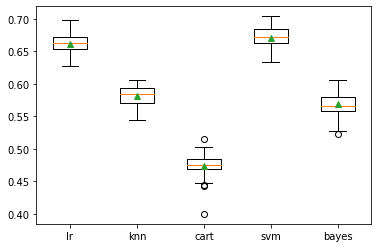

In [70]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X = x_train_rus
y = y_train_rus

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### - Next, we can try to combine these five models into a single ensemble model using stacking.     
      
### - We can use a logistic regression model to learn how to best combine the predictions from each of the separate five models.      

>lr 0.662 (0.018)
>knn 0.582 (0.015)
>cart 0.467 (0.024)
>svm 0.670 (0.016)
>bayes 0.569 (0.020)
>stacking 0.678 (0.015)


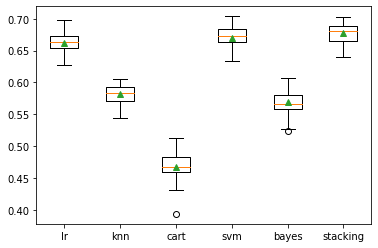

In [71]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X = x_train_rus
y = y_train_rus

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### If we choose a stacking ensemble as our final model, we can fit and use it to make predictions on new data just like any other model.

### First, the stacking ensemble is fit on all available data, then the predict() function can be called to make predictions on new data.

### The example below demonstrates this on our classification dataset.

In [ ]:

# # make a prediction with a stacking ensemble
# from sklearn.datasets import make_classification
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# # define the base models
# level0 = list()
# level0.append(('lr', LogisticRegression()))
# level0.append(('knn', KNeighborsClassifier()))
# level0.append(('cart', DecisionTreeClassifier()))
# level0.append(('svm', SVC()))
# level0.append(('bayes', GaussianNB()))
# # define meta learner model
# level1 = LogisticRegression()
# # define the stacking ensemble
# model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# # fit the model on all available data
# model.fit(X, y)
# # make a prediction for one example
# data = [[2.47475454,0.40165523,1.68081787,2.88940715,0.91704519,-3.07950644,4.39961206,0.72464273,-4.86563631,-6.06338084,-1.22209949,-0.4699618,1.01222748,-0.6899355,-0.53000581,6.86966784,-3.27211075,-6.59044146,-2.21290585,-3.139579]]
# yhat = model.predict(data)
# print('Predicted Class: %d' % (yhat))

# ensemble - bagging (Decision Trees)

In [72]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
X = x_train_rus
y = y_train_rus
# define the model
model = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.551 (0.020)


# ensemble - booasting (Decision Trees)

In [74]:
# AdaBoost Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
# define dataset
X = x_train_rus
Y = y_train_rus
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.59117819972988


# performance matric and accuracy